# AM2.5 analysis

# Setup

In [1]:
import os
import shutil
import glob
import pandas as pd
import numpy as np
import xarray as xr
import xgcm
import pickle as pkl

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath

import cmocean.cm as cmo

import warnings

In [2]:
## some magic to automatically reload my functions before running a new cell
%load_ext autoreload
## %reload_ext autoreload
%autoreload 1
%aimport my_functions

import my_functions as mf

## Figure settings

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160

# %config InlineBackend.figure_formats = ['pdf']
%config InlineBackend.figure_formats = ['png']

# Get data

In [4]:
def drop_vars(ds, keep_vars):
    all_vars = list(ds.data_vars)
    drop_vars = []
    for var in all_vars:
        if var not in keep_vars:
            drop_vars.append(var)
    return ds.drop_vars(drop_vars)

In [5]:
def getoutput(expname, variable, tslice=None, keep_vars=None, toLoad=False):
    runpath = '/tiger/scratch/gpfs/GEOCLIM/bgb2/AM2.5/work/'+expname+'_tigercpu_intelmpi_18_540PE/POSTP/'
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ds = xr.open_mfdataset(runpath+'*.'+variable+'.nc')

    if type(keep_vars) == list:
        if toLoad:
            if type(tslice) == slice:
                return drop_vars(ds, keep_vars).sel(time=tslice).load()
            else:
                return drop_vars(ds, keep_vars).load()
        else:
            if type(tslice) == slice:
                return drop_vars(ds, keep_vars).sel(time=tslice)
            else:
                return drop_vars(ds, keep_vars)
    else:
        if toLoad:
            if type(tslice) == slice:
                return ds.sel(time=tslice).load()
            else:
                return ds.load()
        else:
            if type(tslice) == slice:
                return ds.sel(time=tslice)
            else:
                return ds

In [6]:
amon_diagvars = ['land_mask','area','t_surf','evap','precip']
amon_albvars = ['alb_sfc','swdn_sfc','swup_sfc']
amon_radvars = ['netrad_toa','lwdn_toa','lwup_toa','swdn_toa','swup_toa']
amon_radclrvars = ['netrad_toa_clr','lwdn_toa_clr','lwup_toa_clr','swdn_toa_clr','swup_toa_clr']
amon_windvars = ['u_ref','v_ref','ucomp','vcomp']

lmon_diagvars = ['vegn_LAI','vegn_height','bl','transp']

amon_htvars = []

In [7]:
%%time

amon_keep_vars = ['precip']
# lmon_keep_vars = lmon_diagvars

toLoad = False

tslice_coldphys = slice('0111-01','0171-12')
tslice_hotphys = slice('0111-01','0160-12')

print('CTL1990s_1xCO2')
amon_1xco2 = getoutput('CTL1990s_1xCO2', 'atmos_month', tslice=tslice_coldphys, keep_vars=amon_keep_vars, toLoad=toLoad)
# lmon_1xco2 = getoutput('CTL1990s_1xCO2', 'land_month', tslice=tslice_coldphys, keep_vars=lmon_keep_vars, toLoad=toLoad)

print('CTL1990s_vegn2xCO2')
amon_vegn2xco2 = getoutput('CTL1990s_vegn2xCO2', 'atmos_month', tslice=tslice_coldphys, keep_vars=amon_keep_vars, toLoad=toLoad)
# lmon_vegn2xco2 = getoutput('CTL1990s_vegn2xCO2', 'land_month', tslice=tslice_coldphys, keep_vars=lmon_keep_vars, toLoad=toLoad)

print('CTL1990s_2xCO2_plus2K')
amon_2xco2_plus2k = getoutput('CTL1990s_2xCO2_plus2K', 'atmos_month', tslice=tslice_hotphys, keep_vars=amon_keep_vars, toLoad=toLoad)
# lmon_2xco2_plus2k = getoutput('CTL1990s_2xCO2_plus2K', 'land_month', tslice=tslice_hotphys, keep_vars=lmon_keep_vars, toLoad=toLoad)

print('CTL1990s_phys2xCO2_plus2K')
amon_phys2xco2_plus2k = getoutput('CTL1990s_phys2xCO2_plus2K', 'atmos_month', tslice=tslice_hotphys, keep_vars=amon_keep_vars, toLoad=toLoad)
# lmon_phys2xco2_plus2k = getoutput('CTL1990s_phys2xCO2_plus2K', 'land_month', tslice=tslice_hotphys, keep_vars=lmon_keep_vars, toLoad=toLoad)

amon_1xco2 = amon_1xco2.rename(grid_yt='lat',grid_xt='lon')
# lmon_1xco2 = lmon_1xco2.rename(grid_yt='lat',grid_xt='lon')
amon_vegn2xco2 = amon_vegn2xco2.rename(grid_yt='lat',grid_xt='lon')
# lmon_vegn2xco2 = lmon_vegn2xco2.rename(grid_yt='lat',grid_xt='lon')
amon_2xco2_plus2k = amon_2xco2_plus2k.rename(grid_yt='lat',grid_xt='lon')
# lmon_2xco2_plus2k = lmon_2xco2_plus2k.rename(grid_yt='lat',grid_xt='lon')
amon_phys2xco2_plus2k = amon_phys2xco2_plus2k.rename(grid_yt='lat',grid_xt='lon')
# lmon_phys2xco2_plus2k = lmon_phys2xco2_plus2k.rename(grid_yt='lat',grid_xt='lon')

In [15]:
lat = amon_1xco2.lat
lon = amon_1xco2.lon

In [8]:
%%time
print('CTL1990s_1xCO2')
amon_1xco2 = amon_1xco2.persist()
# lmon_1xco2 = lmon_1xco2.persist()

print('CTL1990s_vegn2xCO2')
amon_vegn2xco2 = amon_vegn2xco2.persist()
# lmon_vegn2xco2 = lmon_vegn2xco2.persist()

print('CTL1990s_2xCO2_plus2K')
amon_2xco2_plus2k = amon_2xco2_plus2k.persist()
# lmon_2xco2_plus2k = lmon_2xco2_plus2k.persist()

print('CTL1990s_phys2xCO2_plus2K')
amon_phys2xco2_plus2k = amon_phys2xco2_plus2k.persist()
# lmon_phys2xco2_plus2k = lmon_phys2xco2_plus2k.persist()

CTL1990s_1xCO2
CTL1990s_vegn2xCO2
CTL1990s_2xCO2_plus2K
CTL1990s_phys2xCO2_plus2K
CPU times: user 2.99 s, sys: 3.26 s, total: 6.25 s
Wall time: 2min 22s


# Functions

# Precipitation and ITCZ

## Mean state

(-8625154.6651, 8625154.6651)

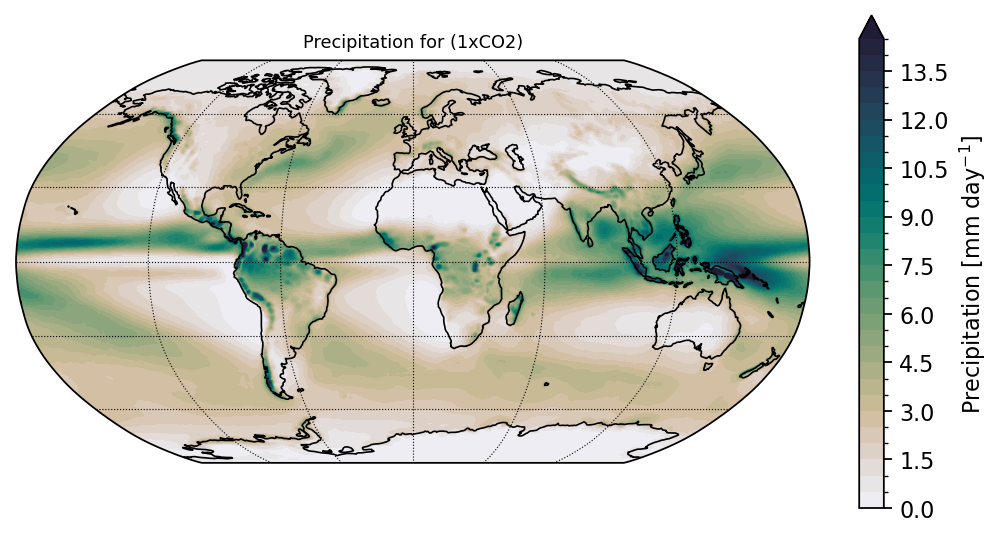

In [14]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

(amon_1xco2['precip'].mean(dim='time')*86400).plot.contourf(ax=ax,levels=np.arange(0,15,0.5), cmap=cmo.rain,
                                                            extend='max', transform=ccrs.PlateCarree(),
                                                            cbar_kwargs={'label':'Precipitation [mm day$^{-1}$]'})
ax.set_title('Precipitation for (1xCO2)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

-20.25 20.25


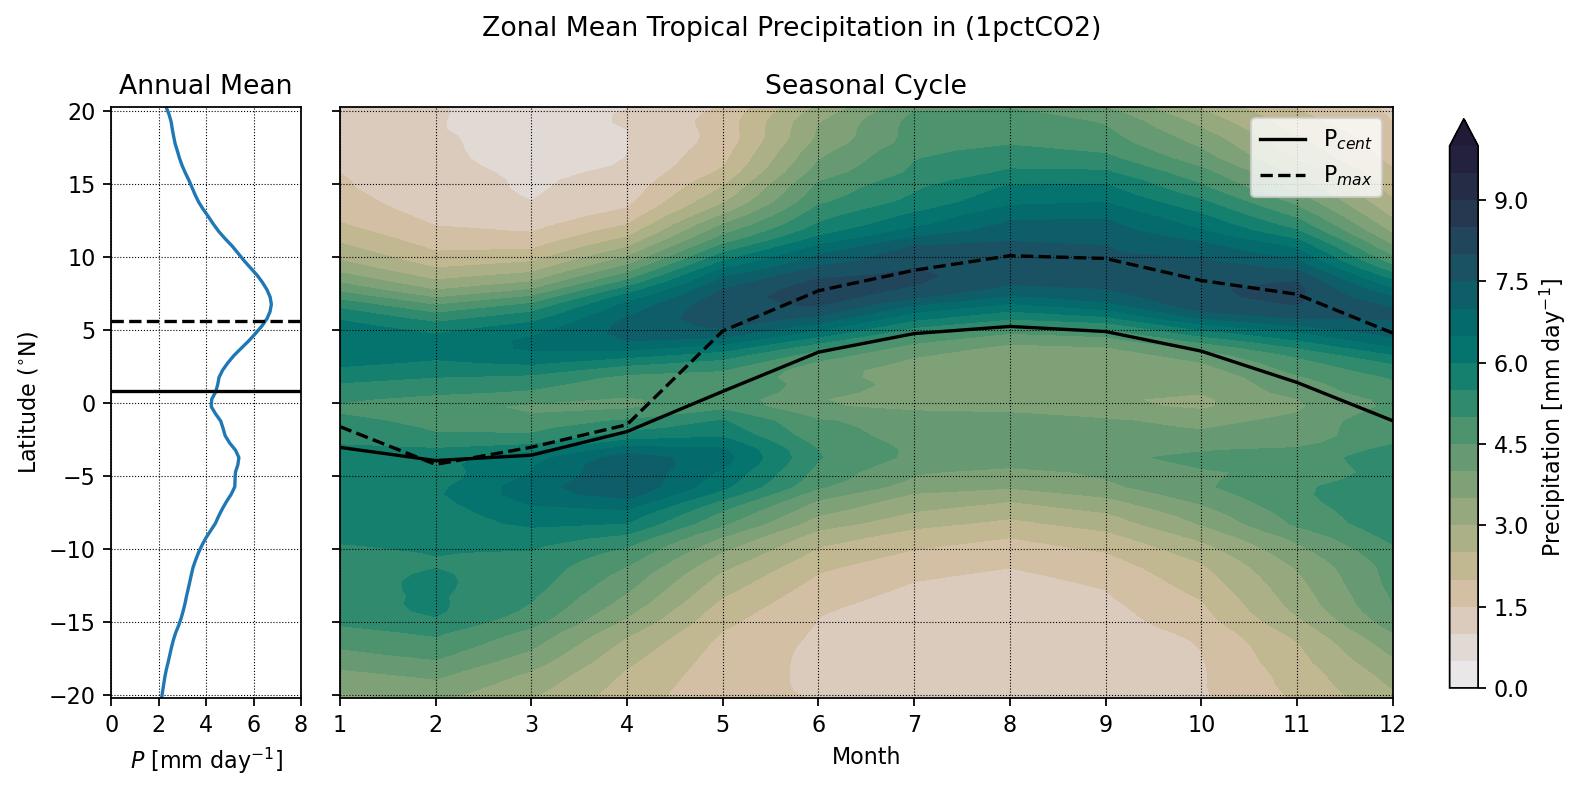

In [58]:
lat1 = -20.25
lat2 = 20.25
zm_sc_precip = amon_1xco2['precip'].sel(lat=slice(lat1,lat2)).groupby('time.month').mean(dim=['lon','time'])*86400
zm_an_precip = amon_1xco2['precip'].sel(lat=slice(lat1,lat2)).mean(dim=['lon','time'])*86400
itcz_sc_N1 = mf.get_itcz_metric(zm_sc_precip, lat1, lat2, 1, toPrint=True)
itcz_sc_N10 = mf.get_itcz_metric(zm_sc_precip, lat1, lat2, 10)
itcz_an_N1 = mf.get_itcz_metric(zm_an_precip, lat1, lat2, 1)
itcz_an_N10 = mf.get_itcz_metric(zm_an_precip, lat1, lat2, 10)

month = zm_sc_precip.month
troplat = zm_sc_precip.lat

fig,axes = plt.subplots(1,2,width_ratios=[1,6],sharey=True,figsize=(10,5))
ax = axes.ravel()

ax[0].plot(zm_an_precip*np.cos(np.deg2rad(troplat)),troplat)
ax[0].hlines(itcz_an_N1,0,10,color='black')
ax[0].hlines(itcz_an_N10,0,10,color='black',ls='--')
ax[0].grid(color='k', ls=':', lw=0.5)
ax[0].set_xlim(0,8)
ax[0].set_xlabel('$P$ [mm day$^{-1}$]')
ax[0].set_xticks(np.arange(0,8.1,2))
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
ax[0].set_yticks(np.arange(round(lat1),lat2+0.1,5))
ax[0].set_title('Annual Mean')

cf = ax[1].contourf(month, troplat, zm_sc_precip.transpose('lat','month')*np.cos(np.deg2rad(troplat)),
                    levels=np.arange(0,10.1,0.5), extend='max', cmap=cmo.rain)  
ax[1].plot(month, itcz_sc_N1, c='black', label='P$_{cent}$')
ax[1].plot(month, itcz_sc_N10, c='black', ls='--', label='P$_{max}$')
fig.colorbar(cf, ax=ax[1], fraction=0.025, label='Precipitation [mm day$^{-1}$]')
ax[1].grid(color='k', ls=':', lw=0.5)
ax[1].set_title('Seasonal Cycle')
ax[1].set_xticks(np.arange(1,13))
ax[1].set_xlabel('Month')
ax[1].legend()

fig.suptitle('Zonal Mean Tropical Precipitation in (1pctCO2)')
fig.tight_layout()

## FULL$-$RAD

(-8625154.6651, 8625154.6651)

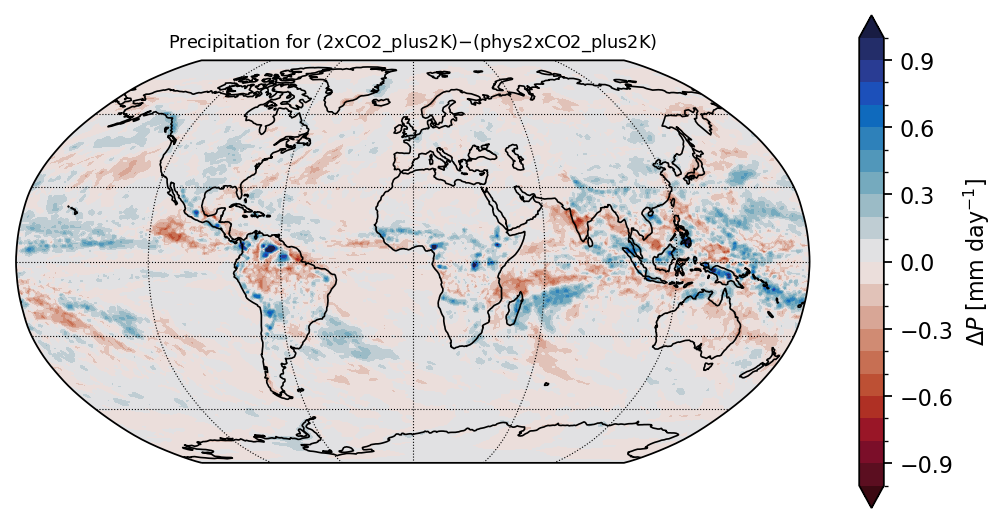

In [19]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

((amon_2xco2_plus2k['precip'].mean(dim='time')-amon_phys2xco2_plus2k['precip'].mean(dim='time'))*86400).plot.contourf(ax=ax, levels=np.arange(-1,1.1,0.1), cmap=cmo.balance_r,
                                                                                                                      extend='both', transform=ccrs.PlateCarree(),
                                                                                                                      cbar_kwargs={'label':'$\Delta P$ [mm day$^{-1}$]'})
ax.set_title('Precipitation for (2xCO2_plus2K)$-$(phys2xCO2_plus2K)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

-20.25 20.25


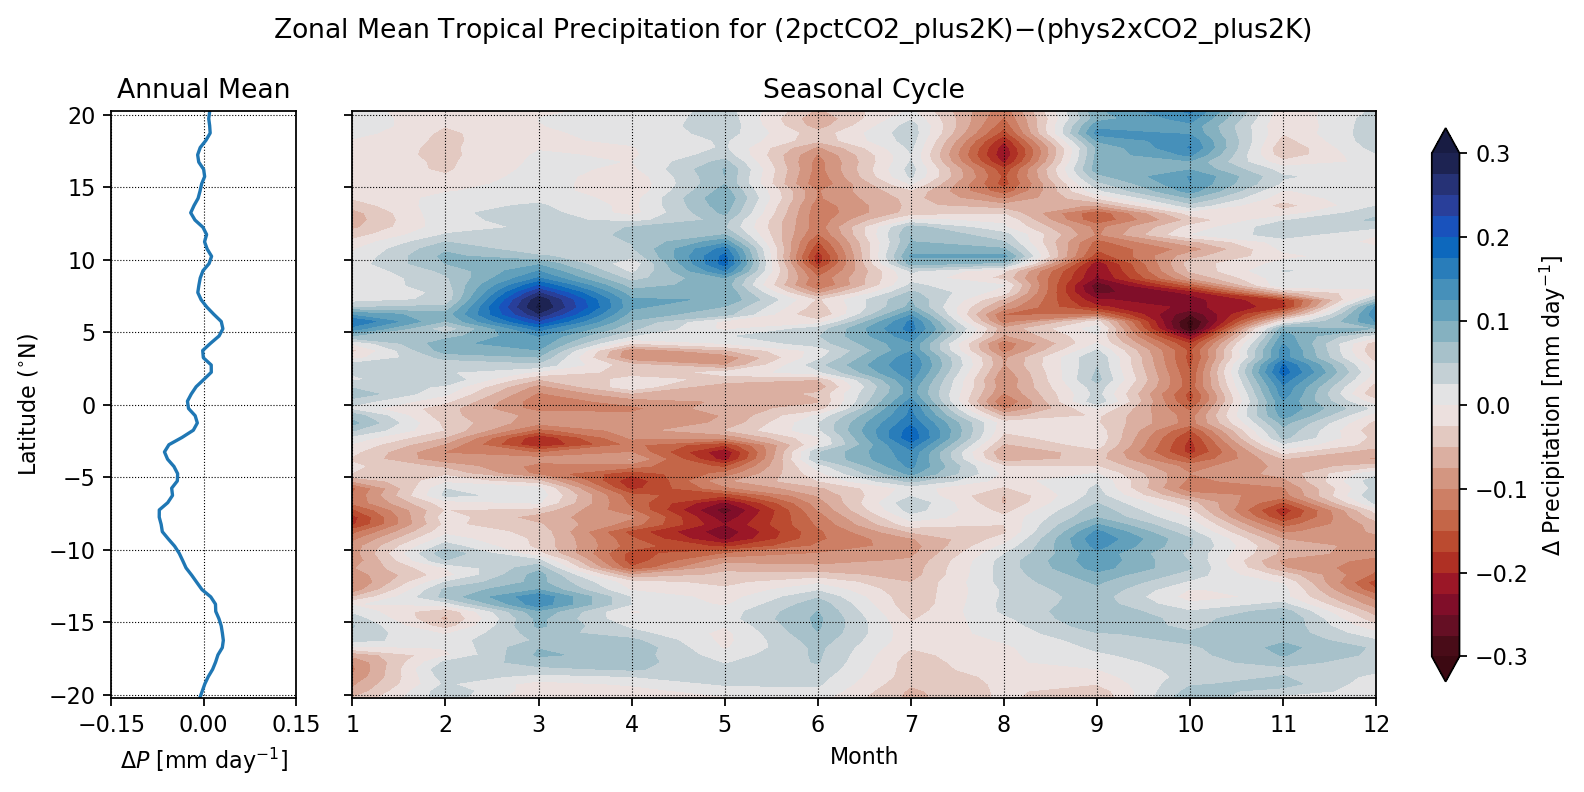

In [83]:
lat1 = -20.25
lat2 = 20.25

zm_sc_full_precip = amon_2xco2_plus2k['precip'].sel(lat=slice(lat1,lat2)).groupby('time.month').mean(dim=['lon','time'])*86400
zm_an_full_precip = amon_2xco2_plus2k['precip'].sel(lat=slice(lat1,lat2)).mean(dim=['lon','time'])*86400
zm_sc_rad_precip = amon_phys2xco2_plus2k['precip'].sel(lat=slice(lat1,lat2)).groupby('time.month').mean(dim=['lon','time'])*86400
zm_an_rad_precip = amon_phys2xco2_plus2k['precip'].sel(lat=slice(lat1,lat2)).mean(dim=['lon','time'])*86400

zm_sc_precip_fullrad = zm_sc_full_precip - zm_sc_rad_precip
zm_an_precip_fullrad = zm_an_full_precip - zm_an_rad_precip

itcz_sc_N1_full = mf.get_itcz_metric(zm_sc_full_precip, lat1, lat2, 1, toPrint=True)
itcz_sc_N10_full = mf.get_itcz_metric(zm_sc_full_precip, lat1, lat2, 10)
itcz_an_N1_full = mf.get_itcz_metric(zm_an_full_precip, lat1, lat2, 1)
itcz_an_N10_full = mf.get_itcz_metric(zm_an_full_precip, lat1, lat2, 10)

itcz_sc_N1_rad = mf.get_itcz_metric(zm_sc_rad_precip, lat1, lat2, 1)
itcz_sc_N10_rad = mf.get_itcz_metric(zm_sc_rad_precip, lat1, lat2, 10)
itcz_an_N1_rad = mf.get_itcz_metric(zm_an_rad_precip, lat1, lat2, 1)
itcz_an_N10_rad = mf.get_itcz_metric(zm_an_rad_precip, lat1, lat2, 10)

itcz_sc_N1_fullrad = itcz_sc_N1_full - itcz_sc_N1_rad
itcz_sc_N10_fullrad = itcz_sc_N10_full - itcz_sc_N10_rad
itcz_an_N1_fullrad = itcz_an_N1_full - itcz_an_N1_rad
itcz_an_N10_fullrad = itcz_an_N10_full - itcz_an_N10_rad

month = zm_sc_full_precip.month
troplat = zm_sc_full_precip.lat

fig,axes = plt.subplots(1,2,width_ratios=[1,6],sharey=True,figsize=(10,5))
ax = axes.ravel()

ax[0].plot(zm_an_precip_fullrad*np.cos(np.deg2rad(troplat)), troplat)
ax[0].grid(color='k', ls=':', lw=0.5)
ax[0].set_xlim(-0.15,0.15)
ax[0].set_xlabel('$\Delta P$ [mm day$^{-1}$]')
ax[0].set_xticks(np.arange(-0.15,0.151,0.15))
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
ax[0].set_yticks(np.arange(round(lat1),lat2+0.1,5))
ax[0].set_title('Annual Mean')

cf = ax[1].contourf(month, troplat, zm_sc_precip_fullrad.transpose('lat','month')*np.cos(np.deg2rad(troplat)),
                    levels=np.arange(-0.3,0.31,0.025), extend='both', cmap=cmo.balance_r)  
cb = fig.colorbar(cf, ax=ax[1], fraction=0.025, label='$\Delta$ Precipitation [mm day$^{-1}$]')
cb.set_ticks(np.arange(-0.3,0.31,0.1))
ax[1].grid(color='k', ls=':', lw=0.5)
ax[1].set_title('Seasonal Cycle')
ax[1].set_xticks(np.arange(1,13))
ax[1].set_xlabel('Month')

fig.suptitle('Zonal Mean Tropical Precipitation for (2pctCO2_plus2K)$-$(phys2xCO2_plus2K)')
fig.tight_layout()

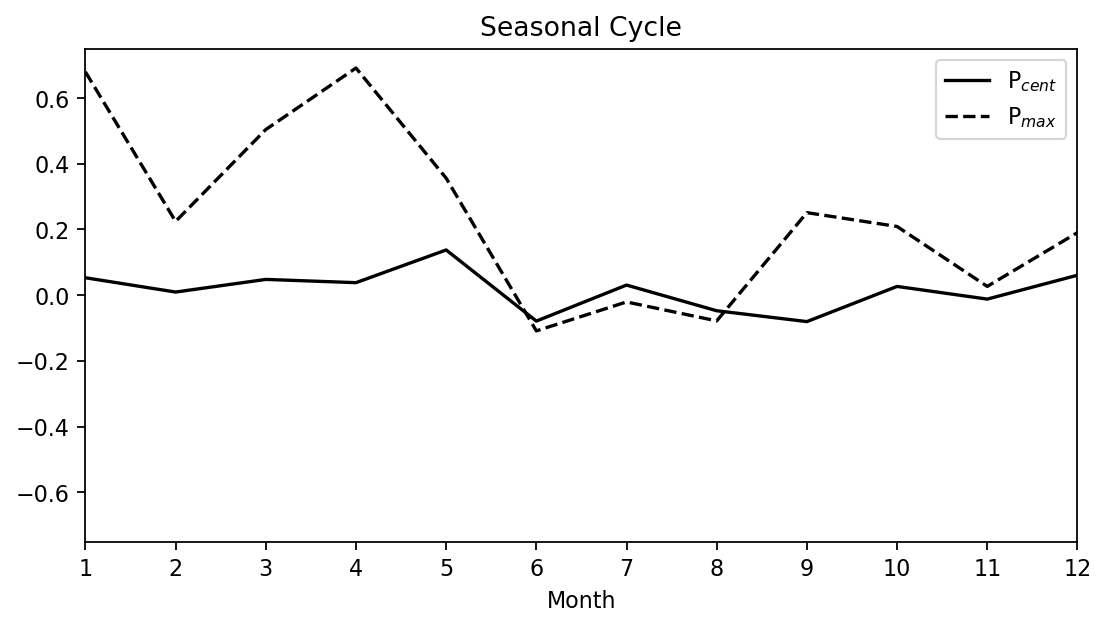

In [81]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(month, itcz_sc_N1_fullrad, c='black', label='P$_{cent}$')
ax.plot(month, itcz_sc_N10_fullrad, c='black', ls='--', label='P$_{max}$')
ax.set_ylim(-0.75,0.75)
ax.set_xlim(1,12)
ax.set_title('Seasonal Cycle')
ax.set_xticks(np.arange(1,13))
ax.set_xlabel('Month')
ax.legend()

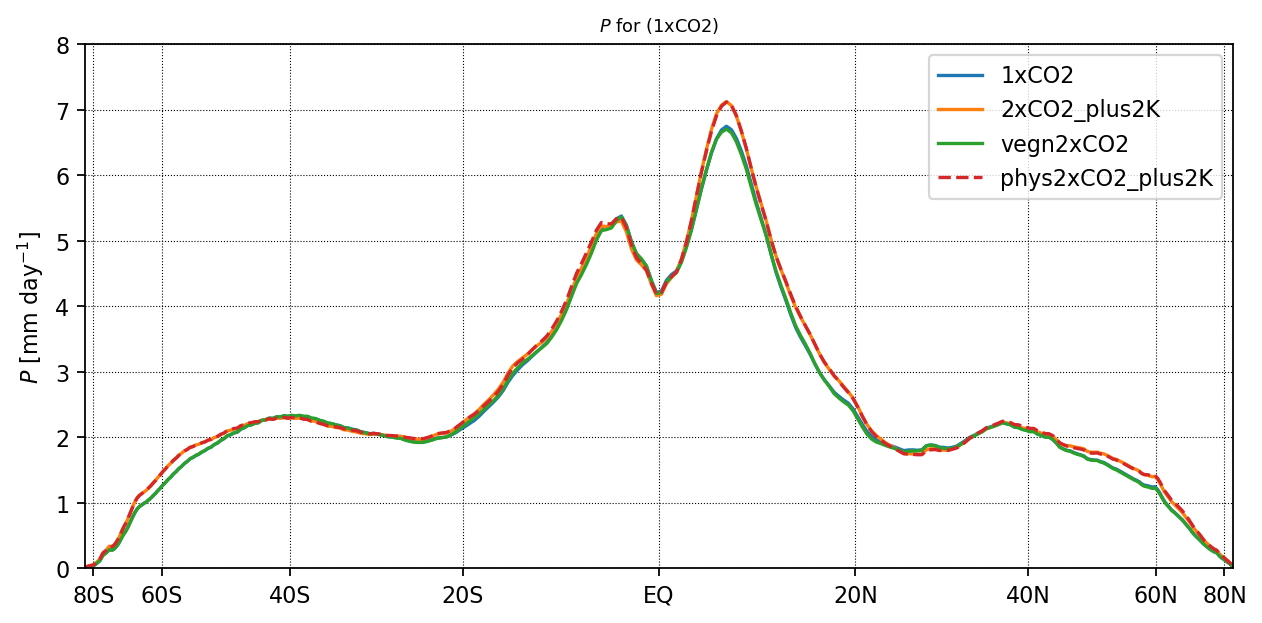

In [16]:
fig,ax = plt.subplots(figsize=(8,4))
sinlat = np.sin(np.deg2rad(lat))
xticks = np.sin(np.deg2rad([-80, -60, -40, -20, 0, 20, 40, 60, 80]))
xticklabels = ['80S', '60S', '40S', '20S', 'EQ', '20N', '40N', '60N', '80N']

ax.plot(sinlat, amon_1xco2['precip'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))*86400, label='1xCO2')
ax.plot(sinlat, amon_2xco2_plus2k['precip'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))*86400, label='2xCO2_plus2K')
ax.plot(sinlat, amon_vegn2xco2['precip'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))*86400, label='vegn2xCO2')
ax.plot(sinlat, amon_phys2xco2_plus2k['precip'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))*86400, label='phys2xCO2_plus2K', ls='--')

ax.set_title('$P$ for (1xCO2)', fontsize=8)
ax.set_ylabel('$P$ [mm day$^{-1}$]')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlim(-1,1)
ax.set_ylim(0,8)
ax.grid(ls=':',color='k',lw=0.5)

ax.legend()
fig.tight_layout()

NameError: name 'lmon_1xco2' is not defined

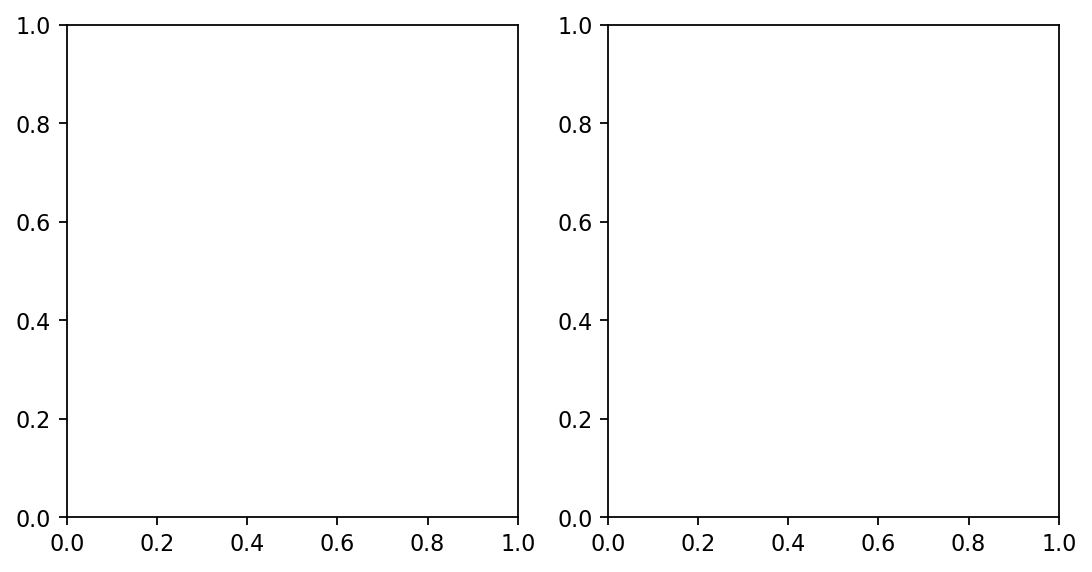

In [12]:
fig,axes = plt.subplots(1,2,figsize=(8,4))
ax = axes.ravel()

(lmon_1xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).mean(dim='lat').plot(ax=ax[0], lw=0.5)
(lmon_vegn2xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).mean(dim='lat').plot(ax=ax[1], lw=0.5)

ax[0].set_title('CTL1990s_1xCO2')
ax[1].set_title('CTL1990s_vegn2xCO2')

for a in ax:
    a.set_ylim(1.5,4)
fig.suptitle('Global mean LAI')
fig.tight_layout()

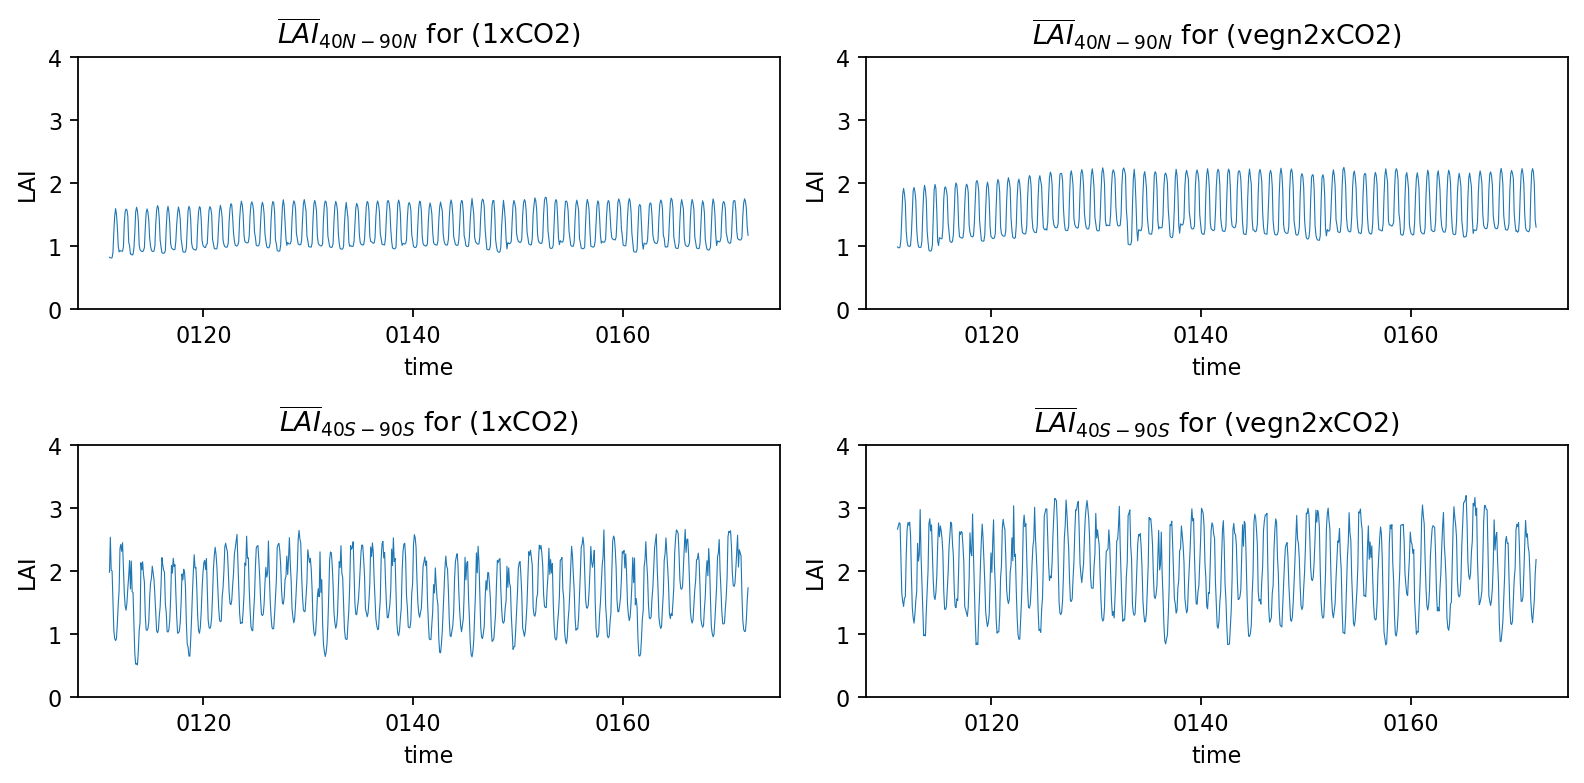

In [50]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
ax = axes.ravel()

(lmon_1xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(40,90)).mean(dim='lat').plot(ax=ax[0], lw=0.5)
(lmon_vegn2xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(40,90)).mean(dim='lat').plot(ax=ax[1], lw=0.5)
(lmon_1xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(-90,-40)).mean(dim='lat').plot(ax=ax[2], lw=0.5)
(lmon_vegn2xco2['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(-90,-40)).mean(dim='lat').plot(ax=ax[3], lw=0.5)

ax[0].set_title('$\overline{LAI}_{40N-90N}$ for (1xCO2)')
ax[1].set_title('$\overline{LAI}_{40N-90N}$ for (vegn2xCO2)')
ax[2].set_title('$\overline{LAI}_{40S-90S}$ for (1xCO2)')
ax[3].set_title('$\overline{LAI}_{40S-90S}$ for (vegn2xCO2)')

for a in ax:
    a.set_ylim(0,4)
    a.set_ylabel('LAI')
fig.tight_layout()

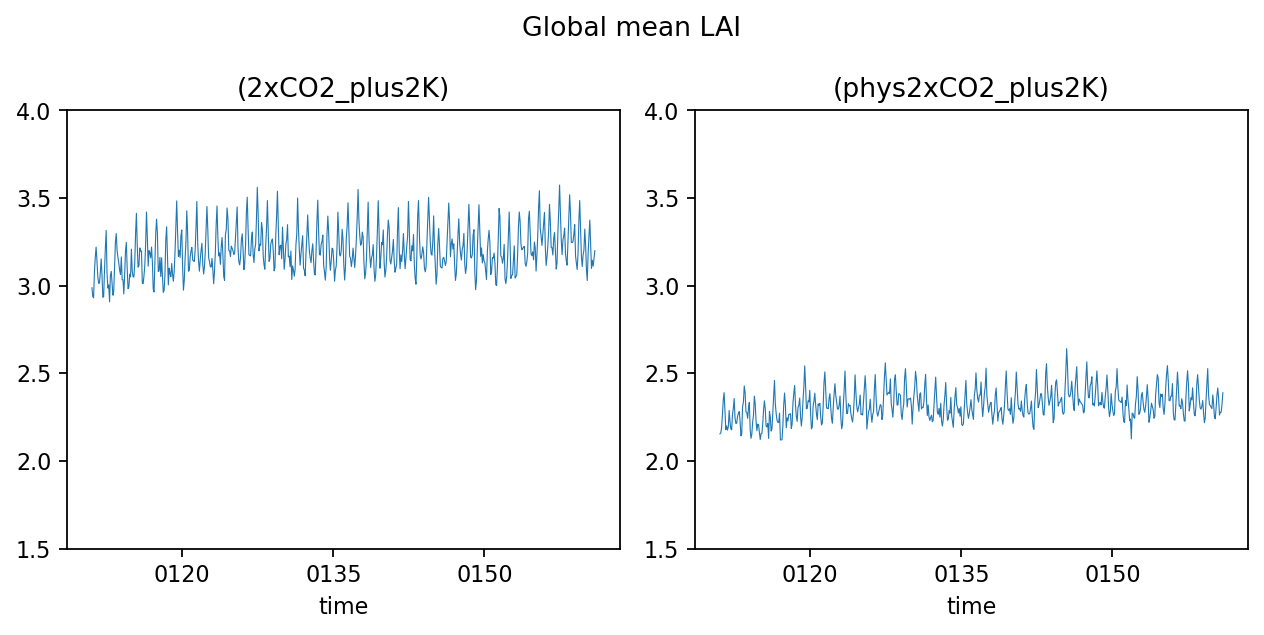

In [16]:
fig,axes = plt.subplots(1,2,figsize=(8,4))
ax = axes.ravel()

(lmon_2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).mean(dim='lat').plot(ax=ax[0], lw=0.5)
(lmon_phys2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).mean(dim='lat').plot(ax=ax[1], lw=0.5)

ax[0].set_title('(2xCO2_plus2K)')
ax[1].set_title('(phys2xCO2_plus2K)')

for a in ax:
    a.set_ylim(1.5,4)
fig.suptitle('Global mean LAI')
fig.tight_layout()

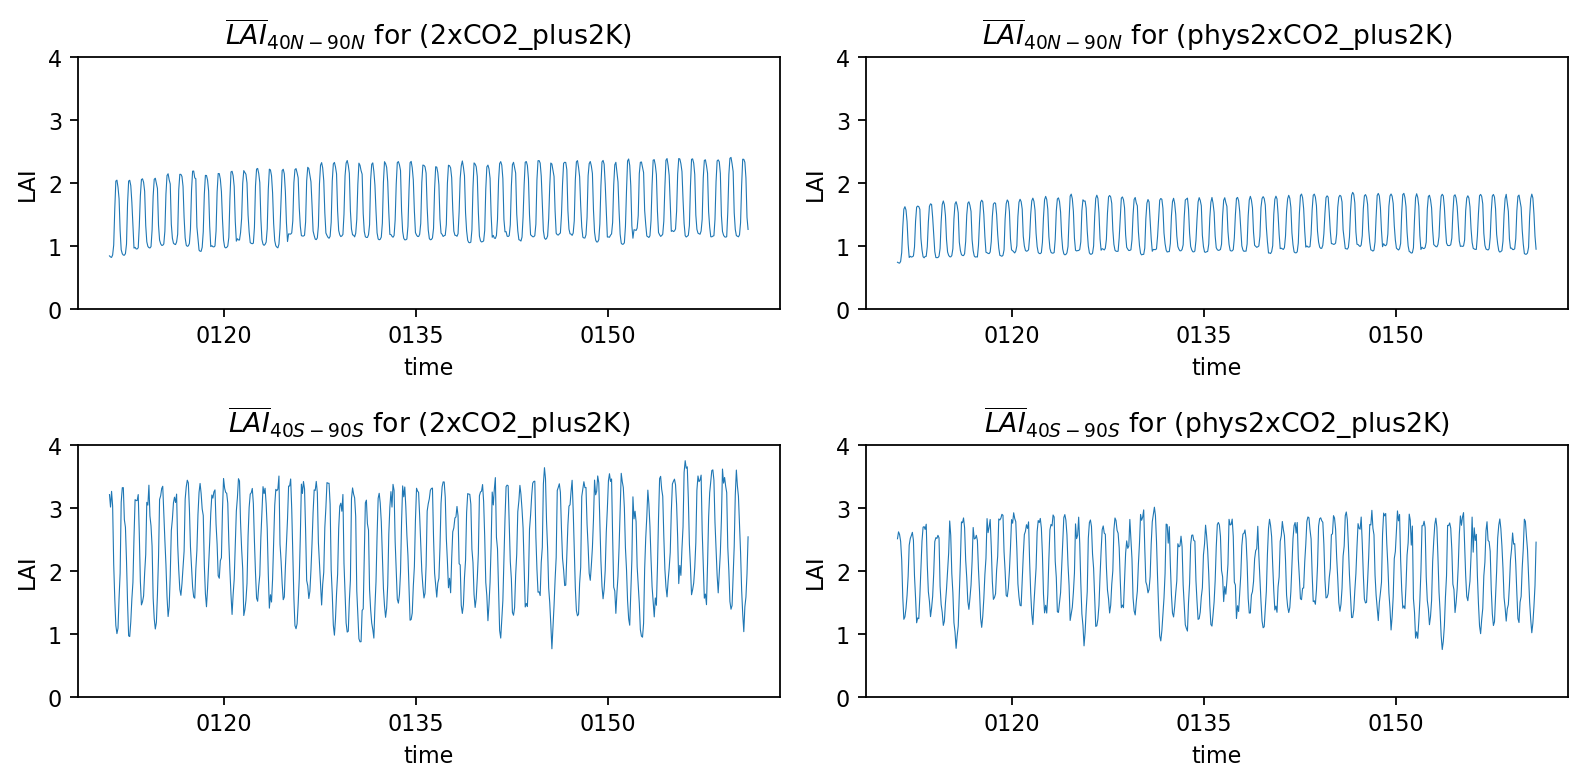

In [17]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
ax = axes.ravel()

(lmon_2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(40,90)).mean(dim='lat').plot(ax=ax[0], lw=0.5)
(lmon_phys2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(40,90)).mean(dim='lat').plot(ax=ax[1], lw=0.5)
(lmon_2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(-90,-40)).mean(dim='lat').plot(ax=ax[2], lw=0.5)
(lmon_phys2xco2_plus2k['vegn_LAI'].mean(dim='lon')*np.cos(np.deg2rad(lat))).sel(lat=slice(-90,-40)).mean(dim='lat').plot(ax=ax[3], lw=0.5)

ax[0].set_title('$\overline{LAI}_{40N-90N}$ for (2xCO2_plus2K)')
ax[1].set_title('$\overline{LAI}_{40N-90N}$ for (phys2xCO2_plus2K)')
ax[2].set_title('$\overline{LAI}_{40S-90S}$ for (2xCO2_plus2K)')
ax[3].set_title('$\overline{LAI}_{40S-90S}$ for (phys2xCO2_plus2K)')

for a in ax:
    a.set_ylim(0,4)
    a.set_ylabel('LAI')
fig.tight_layout()

In [45]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

(amon_vegn2xco2['t_surf']-amon_1xco2['t_surf']).mean(dim='time').plot.contourf(ax=ax,levels=np.arange(-0.5,0.51,0.01),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta T_{surf}$ for (vegn2xCO2)$-$(1xCO2)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x2b05fab08d60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2b0600259620> (for post_execute):



KeyboardInterrupt



In [ ]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

(amon_2xco2_plus2k['t_surf']-amon_phys2xco2_plus2k['t_surf']).mean(dim='time').plot.contourf(ax=ax,levels=np.arange(-0.5,0.51,0.01),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta T_{surf}$ for (2xCO2_plus2K)$-$(phys2xCO2_plus2K)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sinlat = np.sin(np.deg2rad(lat))
xticks = np.sin(np.deg2rad([-80, -60, -40, -20, 0, 20, 40, 60, 80]))
xticklabels = ['80S', '60S', '40S', '20S', 'EQ', '20N', '40N', '60N', '80N']

ax.plot(sinlat, amon_1xco2['t_surf'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))-273.15, label='1xCO2')
ax.plot(sinlat, amon_2xco2_plus2k['t_surf'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))-273.15, label='2xCO2_plus2K')
ax.plot(sinlat, amon_vegn2xco2['t_surf'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))-273.15, label='vegn2xCO2')
ax.plot(sinlat, amon_phys2xco2_plus2k['t_surf'].mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))-273.15, label='phys2xCO2_plus2K', ls='--')

ax.set_title('$T_{surf}$', fontsize=8)
ax.set_ylabel('$T_{surf}$ [K]')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlim(-1,1)
# ax.set_ylim(0,8)
ax.grid(ls=':',color='k',lw=0.5)

ax.legend()
fig.tight_layout()

(-8625154.6651, 8625154.6651)

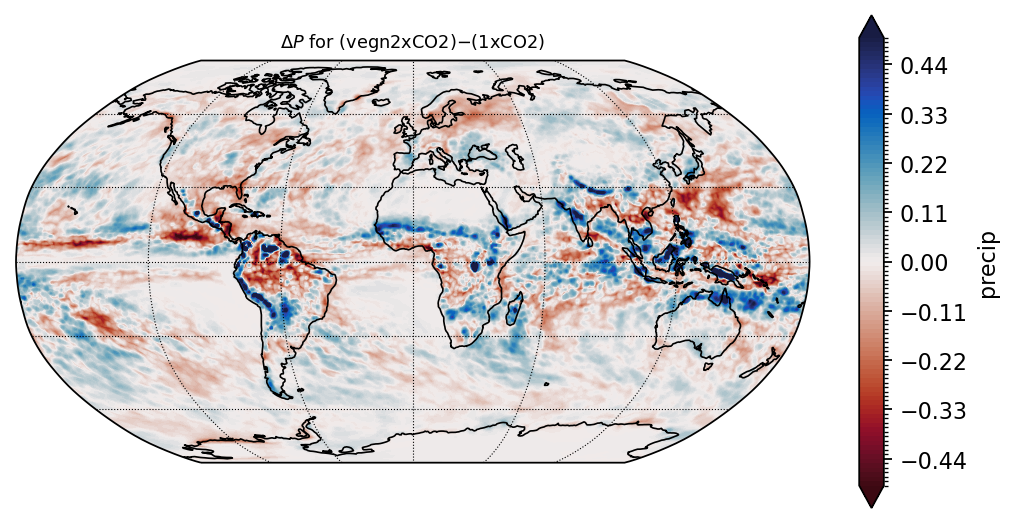

In [13]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

((amon_vegn2xco2['precip']-amon_1xco2['precip']).mean(dim='time')*86400).plot.contourf(ax=ax,levels=np.arange(-0.5,0.51,0.01),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta P$ for (vegn2xCO2)$-$(1xCO2)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

In [28]:
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

In [32]:
pr_2xco2_plus2k = (amon_2xco2_plus2k['precip'].mean(dim='time')*86400).load()
pr_phys2xco2_plus2k = (amon_phys2xco2_plus2k['precip'].mean(dim='time')*86400).load()

(-89.99999999999966, 89.99999999999966)

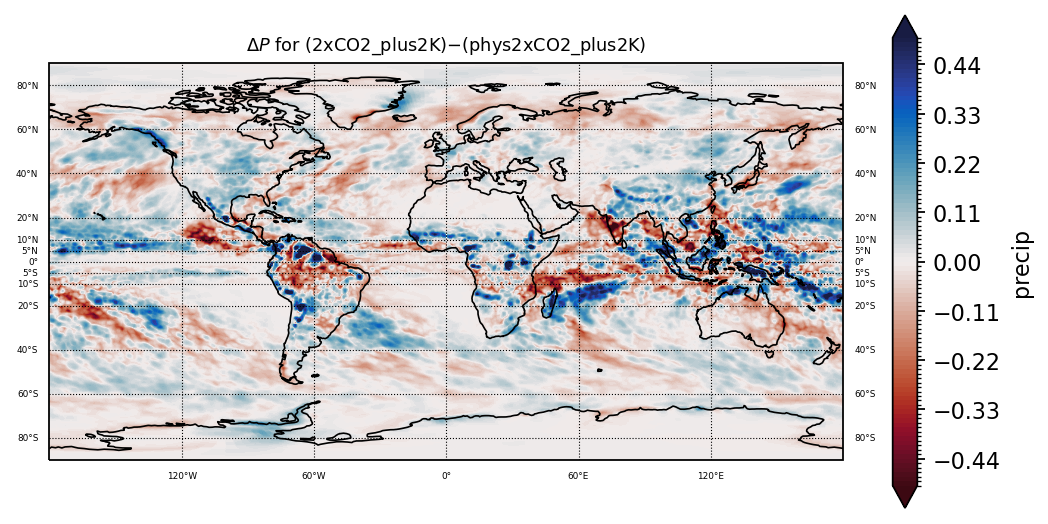

In [37]:
mapproj = ccrs.PlateCarree()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

# ((amon_2xco2_plus2k['precip']-amon_phys2xco2_plus2k['precip']).mean(dim='time')*86400).plot.contourf(ax=ax,levels=np.arange(-0.5,0.51,0.01),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
(pr_2xco2_plus2k-pr_phys2xco2_plus2k).plot.contourf(ax=ax,levels=np.arange(-0.5,0.51,0.01),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta P$ for (2xCO2_plus2K)$-$(phys2xCO2_plus2K)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle=':', color='k', draw_labels=True)
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120])
# gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.ylocator = mticker.FixedLocator([-80, -60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60, 80])

gl.top_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size':4, 'color':'black'}
gl.ylabel_style = {'size':4, 'color':'black'}

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

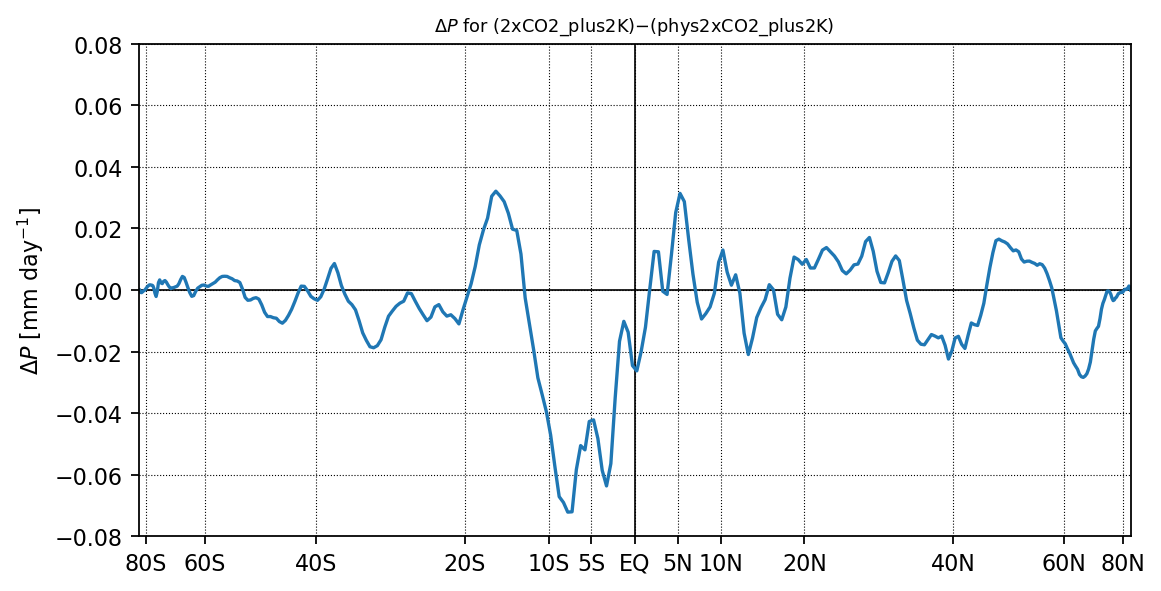

In [21]:
fig,ax = plt.subplots(figsize=(8,4))
sinlat = np.sin(np.deg2rad(lat))
# xticks = np.sin(np.deg2rad([-80, -60, -40, -20, 0, 20, 40, 60, 80]))
# xticklabels = ['80S', '60S', '40S', '20S', 'EQ', '20N', '40N', '60N', '80N']
xticks = np.sin(np.deg2rad([-80, -60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60, 80]))
xticklabels = ['80S', '60S', '40S', '20S', '10S', '5S', 'EQ', '5N', '10N', '20N', '40N', '60N', '80N']

ax.plot(sinlat, ((amon_2xco2_plus2k['precip']-amon_phys2xco2_plus2k['precip']).mean(dim=['time','lon'])*np.cos(np.deg2rad(lat))*86400))

ax.set_title('$\Delta P$ for (2xCO2_plus2K)$-$(phys2xCO2_plus2K)', fontsize=8)
ax.set_ylabel('$\Delta P$ [mm day$^{-1}$]')

ax.vlines(0,-0.8,0.8,lw=0.75,color='k',zorder=0)
ax.hlines(0,-1,1,lw=0.75,color='k',zorder=0)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlim(-1,1)
ax.set_ylim(-0.08,0.08)
ax.grid(ls=':',color='k',lw=0.5)

(-8625154.6651, 8625154.6651)

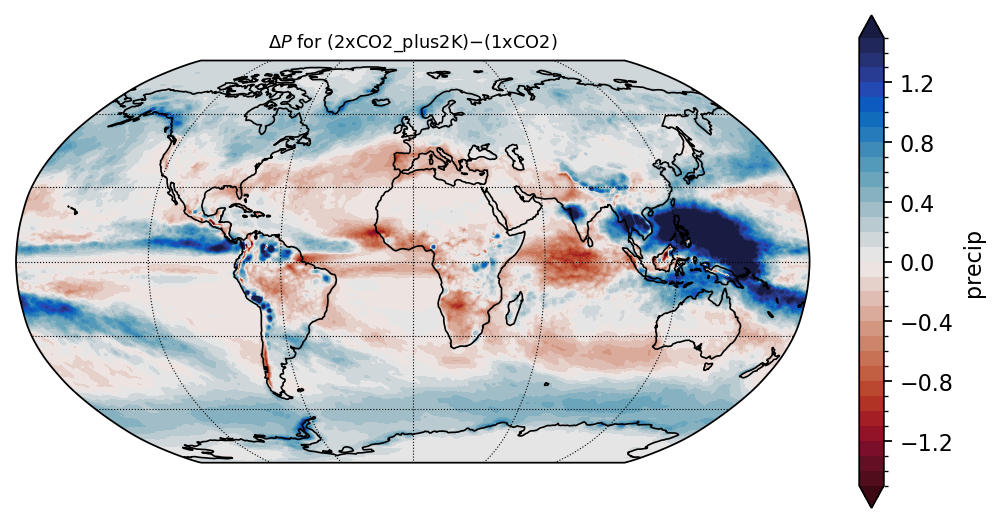

In [24]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

((amon_2xco2_plus2k['precip'].sel(time=slice('0111-01','0160-12'))-amon_1xco2['precip'].sel(time=slice('0111-01','0160-12'))).mean(dim='time')*86400).plot.contourf(ax=ax,levels=np.arange(-1.5,1.51,0.1),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta P$ for (2xCO2_plus2K)$-$(1xCO2)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)

(-8625154.6651, 8625154.6651)

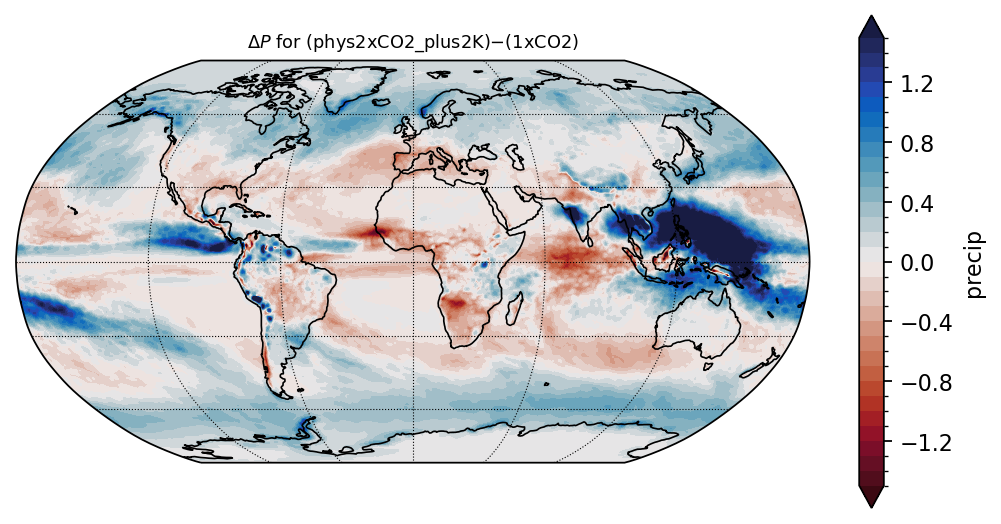

In [25]:
mapproj = ccrs.Robinson()
fig,ax = plt.subplots(figsize=(8,4),subplot_kw={'projection':mapproj})

((amon_phys2xco2_plus2k['precip'].sel(time=slice('0111-01','0160-12'))-amon_1xco2['precip'].sel(time=slice('0111-01','0160-12'))).mean(dim='time')*86400).plot.contourf(ax=ax,levels=np.arange(-1.5,1.51,0.1),cmap=cmo.balance_r,extend='both',transform=ccrs.PlateCarree())
ax.set_title('$\Delta P$ for (phys2xCO2_plus2K)$-$(1xCO2)', fontsize=8)

ax.coastlines(linewidth=0.75)
gl = ax.gridlines(linewidth=0.5, linestyle=':', color='k')
gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

_, y_btm = mapproj.transform_point(0, -90, ccrs.Geodetic())
_, y_top = mapproj.transform_point(0, 90, ccrs.Geodetic())
ax.set_ylim(y_btm, y_top)